## Импорт библиотек и данных

Импортируем необходимые библиотеки для разведочного анализа 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Импортируем данные

In [2]:
# информация о сроках реализации проекта
long = pd.read_csv('https://drive.google.com/uc?id=1n2CIsPZYOIqMfV7b3aUtp1efc9U96xVt&export=download')

# информация по отгрузкам по каждому проекту
fin = pd.read_csv('https://drive.google.com/uc?id=1r3grFMz_k-XuWhRNLOAZCoLDdVYg2C7X&export=download')

Познакомимся со структурами исходных данных

In [3]:
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      477 non-null    int64 
 1   month   477 non-null    object
 2   AM      477 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.3+ KB


Посмотрим на временные границы и формат записи месяцев

In [4]:
long['month'].unique()

array(['ноябрь 2022', 'декабрь 2022', 'январь 2023', 'февраль 2023',
       'март 2023', 'апрель 2023', 'май 2023', 'июнь 2023', 'июль 2023',
       'август 2023', 'сентябрь 2023', 'октябрь 2023', 'ноябрь 2023',
       'декабрь 2023'], dtype=object)

In [5]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             451 non-null    int64 
 1   Причина дубля  301 non-null    object
 2   Ноябрь 2022    156 non-null    object
 3   Декабрь 2022   159 non-null    object
 4   Январь 2023    139 non-null    object
 5   Февраль 2023   145 non-null    object
 6   Март 2023      168 non-null    object
 7   Апрель 2023    174 non-null    object
 8   Май 2023       190 non-null    object
 9   Июнь 2023      190 non-null    object
 10  Июль 2023      195 non-null    object
 11  Август 2023    199 non-null    object
 12  Сентябрь 2023  186 non-null    object
 13  Октябрь 2023   182 non-null    object
 14  Ноябрь 2023    171 non-null    object
 15  Декабрь 2023   146 non-null    object
 16  Январь 2024    95 non-null     object
 17  Февраль 2024   101 non-null    object
 18  Account        451 non-null   

Информация по каждому платежу находится в таблице `fin` - будем считать её основной, а таблицу `long` - словарём, в котором хранятся данные о месяце завершения реализации проекта. 

In [6]:
fin

,id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
0,42,NaN,"36 220,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
1,657,первая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
2,657,вторая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
3,594,NaN,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
4,665,NaN,"10 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,281,основные работы,"76 550,00","79 950,00","66 900,00","89 150,00","108 450,00","77 100,00","78 800,00","126 740,00","117 730,00","115 860,00","160 770,00","142 490,00","99 125,00","74 350,00","105 775,00","92 065,00",Соколова Анастасия Викторовна
447,281,доп работы,"21 450,00","13 300,00","15 900,00","19 850,00","17 350,00","14 650,00","15 900,00","3 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Соколова Анастасия Викторовна
448,785,NaN,NaN,NaN,NaN,"5 306,60","12 898,10","5 287,00","10 180,00","8 600,00","3 860,00","8 600,00","700,00","700,00",в ноль,в ноль,NaN,NaN,Соколова Анастасия Викторовна
449,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"58 200,00","58 200,00","58 200,00","58 200,00","58 200,00","58 200,00",NaN,NaN,Смирнова Ольга Владимировна


Как видим, данные о платежах представлены в виде сводной (широкой таблицы) - что не подходит для анализа. Приведем её к удобному для анализа виду.

In [7]:
df_fin = fin.melt(
    id_vars=['id', 'Account', 'Причина дубля'], # сохраняем столбцы, не участвующие в сфертывании
    var_name='month', # сворачиваем столбцы с датами в один 
    value_name='amount' # суммы в каждой ячейке выносим в отдельный столбец
)

Даем корректные имена столбцам согласно общей стилистике. 

In [8]:
df_fin.columns = ['id', 'account','double', 'month', 'amount']

### Обработка таблиц по столбцу `month`

Посмотрим на временные границы и формат записи месяцев в свернутом столбце `month`

In [9]:
df_fin['month'].unique()

array(['Ноябрь 2022', 'Декабрь 2022', 'Январь 2023', 'Февраль 2023',
       'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023', 'Июль 2023',
       'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023',
       'Декабрь 2023', 'Январь 2024', 'Февраль 2024'], dtype=object)

Как видим, временные промежутки в двух таблицах совпадают. Но в таком виде они не подходят для анализа. Их нужно перевести к виду, подходящему для анализа. 

- Все месяцы отражают не столько конкретную дату, сколько порядковую категорию. Присвоим каждому месяцу номер согласный его положению отностительно других в нашем наборе.

- Мы анализируем эффективность за 2023 год - посчитаем его эталонным и будем вести подсчет месяцев каждого года относительно него.

In [10]:
# присвоим номер месяцу согласно его порядку (рангу) в году
months = {
    "январь": 1,
    "февраль": 2,
    "март": 3,
    "апрель": 4,
    "май": 5,
    "июнь": 6,
    "июль": 7,
    "август": 8,
    "сентябрь": 9,
    "октябрь": 10,
    "ноябрь": 11,
    "декабрь": 12
}

# эталонный год 
etalon_year = 2023

# создадим функцию, чтобы привести наши месяцы к нужному формату
def month_number(month_year):
    
    # уравниваем регистр
    month_year = month_year.lower()

    # проходимся по ключам и значениям нашего словаря
    for m, n in months.items():

        # разбиваем дату на месяц и год по пробелам
        m_, y = month_year.split()

        # проверяем равенство каждого месяца ключу из нашего словаря
        if m == m_:
            # если месяцы совпадают - присваиваем соотвествующий ранг месяцу
            # и взвешиваем его относительно нашего эталонного года
            return (int(y) - etalon_year) * 12 + n 

- каждый год весит 12 месяцев, в зависимости от его порядка относительно нашего эталоннгого года он может быть отрицательным или положительным
- месяцы нашего эталоного года имеют ранги от 1 до 12 соотвественно

Создаем столбец с соответствующими рангами каждого месяца в обеих таблицах

In [11]:
# номер месяца конкретного платежа
df_fin['month_number'] = df_fin['month'].apply(month_number)
df_fin['month_number'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [12]:
# месяц завершения проекта (целевой месяц)
long['month_end'] = long['month'].apply(month_number)
long['month_end'].unique()

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

### Подготовка таблиц к объединению

Делаем срез по таблице `fin`, оставляем только нужные столбцы для дальнейшего анализа

In [13]:
df_fin_query = df_fin[['id', 'double', 'amount', 'month_number']]
df_fin_query

,id,double,amount,month_number
0,42,NaN,"36 220,00",-1
1,657,первая часть оплаты,стоп,-1
2,657,вторая часть оплаты,стоп,-1
3,594,NaN,стоп,-1
4,665,NaN,"10 000,00",-1
...,...,...,...,...
7211,281,основные работы,"92 065,00",14
7212,281,доп работы,NaN,14
7213,785,NaN,NaN,14
7214,913,NaN,NaN,14


Приводим названия столбцов к единому стилю

In [14]:
long.columns = ['id', 'month', 'manager_name', 'month_end']

In [15]:
long

,id,month,manager_name,month_end
0,42,ноябрь 2022,Васильев Артем Александрович,-1
1,453,ноябрь 2022,Васильев Артем Александрович,-1
2,548,ноябрь 2022,Михайлов Андрей Сергеевич,-1
3,87,ноябрь 2022,Соколова Анастасия Викторовна,-1
4,429,ноябрь 2022,Соколова Анастасия Викторовна,-1
...,...,...,...,...
472,955,декабрь 2023,Смирнова Ольга Владимировна,12
473,1004,декабрь 2023,без А/М,12
474,281,декабрь 2023,Соколова Анастасия Викторовна,12
475,785,декабрь 2023,Соколова Анастасия Викторовна,12


Прежде чем переходить к дальнейшему анализу, необходимо избавиться от дубликатов. 
- Информация могла быть обновлена, если изменился менеджер занимающийся проектом.
- Оставим информацию только о тех, кто последним занимался проектом до его завершения.

В таблице со сроками реализации проектов дубликатов быть не должно. 
- Если есть несколько строк для одного проекта с одинм и тем же менеджером - значит это либо технический дубль, либо изменился месяц завершения проекта.
- Последняя информация по срокам завершения проекта - самая актуальная.

В обеих случаях нам нужно удалить все предыдущие упоминания проекта - как неактуальные.

Посмотрим на число дубликатов строк по `id` 

In [16]:
len(long[long['id'].duplicated()])

164

Оставим только последние записи по каждому проекту 

In [17]:
long = long.drop_duplicates(subset='id', keep='last')

Делаем срез по таблице `long`, оставляем только нужные столбцы для дальнейшего анализа

In [18]:
long_query = long[['id', 'manager_name', 'month_end']]

Объединим подготовленные таблицы. К каждой записи об отгрузке добавим актуальные данные о менеджере проекта и месяце его завершения.

In [19]:
df_full = df_fin_query.merge(long_query, on='id', how='left')
df_full

,id,double,amount,month_number,manager_name,month_end
0,42,NaN,"36 220,00",-1,Васильев Артем Александрович,-1.0
1,657,первая часть оплаты,стоп,-1,Васильев Артем Александрович,-1.0
2,657,вторая часть оплаты,стоп,-1,Васильев Артем Александрович,-1.0
3,594,NaN,стоп,-1,Васильев Артем Александрович,-1.0
4,665,NaN,"10 000,00",-1,Васильев Артем Александрович,-1.0
...,...,...,...,...,...,...
7211,281,основные работы,"92 065,00",14,Соколова Анастасия Викторовна,12.0
7212,281,доп работы,NaN,14,Соколова Анастасия Викторовна,12.0
7213,785,NaN,NaN,14,Соколова Анастасия Викторовна,12.0
7214,913,NaN,NaN,14,Смирнова Ольга Владимировна,12.0


### Работа с объединенной таблицей 

Выделим в данных проекты, пролонгированные в первый и второй месяц

Создадим словарь, куда отберем  все проекты, которые были пролонгированы

In [20]:
# избавимся от нулей в столбце суммы
long_ = df_full.mask(df_full['amount'] == 0, np.nan)

# отбремем записи, которые содержат данные о платежах
long_ = long_[long_['amount'].notna()]

# записи, где месяцы оплаты больше, чем месяц завершения проекта
long_ =  long_[long_['month_number'] > long_['month_end']]

# получаем данные по оплатам самым близким к месяцу завершения проекта
long_ = long_.pivot_table(index='id', values='month_number', aggfunc='min').reset_index()
long_.columns = ['id', 'first_amount_month']
long_

,id,first_amount_month
0,31,2
1,48,13
2,56,13
3,107,12
4,112,14
...,...,...
85,975,13
86,977,12
87,998,13
88,1012,12


Добавим месяц первой оплаты после заверешения проекта в общие данные

In [21]:
df_full = df_full.merge(long_, on='id')
df_full

,id,double,amount,month_number,manager_name,month_end,first_amount_month
0,31,NaN,"55 100,00",-1,Васильев Артем Александрович,0.0,2
1,31,NaN,"55 100,00",0,Васильев Артем Александрович,0.0,2
2,31,NaN,NaN,1,Васильев Артем Александрович,0.0,2
3,31,NaN,"44 775,00",2,Васильев Артем Александрович,0.0,2
4,31,NaN,"44 775,00",3,Васильев Артем Александрович,0.0,2
...,...,...,...,...,...,...,...
2331,281,доп работы,NaN,12,Соколова Анастасия Викторовна,12.0,13
2332,281,основные работы,"105 775,00",13,Соколова Анастасия Викторовна,12.0,13
2333,281,доп работы,NaN,13,Соколова Анастасия Викторовна,12.0,13
2334,281,основные работы,"92 065,00",14,Соколова Анастасия Викторовна,12.0,13


#### Создадим категориальный столбец `month_long` для проектов пролонгированных в первый и второй месяц

Теперь посчитаем разницу между месяцем завершения проекта и месяцем первой отгрузки после его завершения. Если эта разница равна 1 — проект пролонгирован в первый месяц, если равна 2 — значит, он не был пролонгирован в первый (иначе попал бы в предыдущую категорию), но пролонгирован во второй.

In [22]:
df_full['month_long'] = df_full['first_amount_month'] - df_full['month_end']
df_full

,id,double,amount,month_number,manager_name,month_end,first_amount_month,month_long
0,31,NaN,"55 100,00",-1,Васильев Артем Александрович,0.0,2,2.0
1,31,NaN,"55 100,00",0,Васильев Артем Александрович,0.0,2,2.0
2,31,NaN,NaN,1,Васильев Артем Александрович,0.0,2,2.0
3,31,NaN,"44 775,00",2,Васильев Артем Александрович,0.0,2,2.0
4,31,NaN,"44 775,00",3,Васильев Артем Александрович,0.0,2,2.0
...,...,...,...,...,...,...,...,...
2331,281,доп работы,NaN,12,Соколова Анастасия Викторовна,12.0,13,1.0
2332,281,основные работы,"105 775,00",13,Соколова Анастасия Викторовна,12.0,13,1.0
2333,281,доп работы,NaN,13,Соколова Анастасия Викторовна,12.0,13,1.0
2334,281,основные работы,"92 065,00",14,Соколова Анастасия Викторовна,12.0,13,1.0


Определение верного месяца пролонгации для записей, которые не относятся к нашему целевому году (**1–12**), значения не имеет — они будут дальше отфильтрованы. Для целевых же месяцев категории определяются корректно.

- Если месяц = **-2**: для *1* и *2* месяцев пролонгации возможны варианты *1* и *-2*.
- Если месяц = **-1**: варианты *-1* и *0*.
- Если месяц = **0**: варианты *1* и *2*.

Можно было бы взять abs и завести отдельную категорию для *0*, но так как эти месяцы нецелевые, оставляем как есть — далее они всё равно будут отфильтрованы.

#### Работа с официальными дублями в таблице по столбцу `double`

In [23]:
len(df_full) - len(df_full[df_full['double'].isna()])

1872

Чтобы обработать такие дубли - нужно разобраться с данными в столбце `amount`

Следуя описанию данных, если в столбце `amount` встечается:
- `стоп` или `end` до последнего месяца реализации - такой проект нужно исключить из анализа

In [24]:
# создадим столбец, который говорит, следует ли удалять эту строку
def amount_end(x):
   
    # если в строке встретился end или стоп
    if x['amount'] == 'end' or x['amount'] == 'стоп':
        
        # и месяц записи меньше или равен месяцу завершения проекта
        return x['month_number'] <= x['month_end'] 
        # возвращаем True

    else:
        return False 
        # иначе False

# создаем такой столбец
df_full['amount_drop'] = df_full.apply(amount_end, axis=1)

# делаем срез id проектов, которые остановились до или во время месяца завершения проекта
drop_id = df_full[df_full['amount_drop'] == True]['id']

# убираем эти проекты из общей выборки
df_full = df_full.query('id not in @drop_id')

# смотрим на число строк после обработки
len(df_full)

2240

Теперь, после всех преобразований, можно удалить все полные дубликаты в общей таблице

In [25]:
df_full = df_full.drop_duplicates()
len(df_full)

2236

Посмотрим на состав значений в столбце `amount`

In [26]:
df_full['amount'].unique()

array(['55\xa0100,00', nan, '44\xa0775,00', '46\xa0200,00',
       '96\xa0400,00', '88\xa0850,00', '83\xa0880,00', '90\xa0965,00',
       '86\xa0975,00', '84\xa0160,00', '75\xa0900,00', '95\xa0105,00',
       '45\xa0950,00', '46\xa0995,00', '252\xa0293,75', '296\xa0130,71',
       '243\xa0591,67', '674\xa0000,00', '36\xa0950,00', '10\xa0200,00',
       '11\xa0900,00', '11\xa0050,00', '55\xa0225,00', '59\xa0600,00',
       '65\xa0450,00', '67\xa0485,00', '50\xa0150,00', '34\xa0000,00',
       '39\xa0600,00', '97\xa0555,00', '54\xa0595,00', '53\xa0700,00',
       '50\xa0120,00', '8\xa0055,00', '25\xa0060,00', '56\xa0385,00',
       '75\xa0180,00', '8\xa0950,00', '40\xa0100,00', '153\xa0212,50',
       '24\xa0615,00', '25\xa0672,50', '41\xa0409,00', '40\xa0869,00',
       '47\xa0540,00', '48\xa0410,00', '52\xa0180,00', '45\xa0800,00',
       '46\xa0380,00', 'end', '227\xa0365,00', '245\xa0595,00',
       '263\xa0745,00', '297\xa0695,00', '257\xa0700,00', '227\xa0242,00',
       '41\xa0300

In [27]:
# убираем неразрывные пробелы и меняем десятичный разделитель на точку
df_full['amount'] = df_full['amount'].str.replace(r'\s+', '', regex=True).str.replace(',', '.', regex=False)   

In [28]:
df_full['amount'].value_counts()

вноль        58
33885.00     12
44775.00     12
64743.00     12
39600.00     12
             ..
54915.00      1
24401.00      1
281395.00     1
1110.00       1
14700.00      1
Name: amount, Length: 730, dtype: int64

Пометим строки, содержащие `в ноль` - в отдельном столбце

In [29]:
# проверяем соответствие 
def v_null(x):
    if x == 'в ноль':
        return 1
    else:
        return 0
        
# логический столбец
df_full['vnull'] = df_full['amount'].apply(v_null)

Устраняем последние нечисловые значения в столбце `amount`

In [30]:
df_full['amount'] = pd.to_numeric(df_full['amount'], errors='coerce')

Посмотрим на распределение данных в столбце `amount`

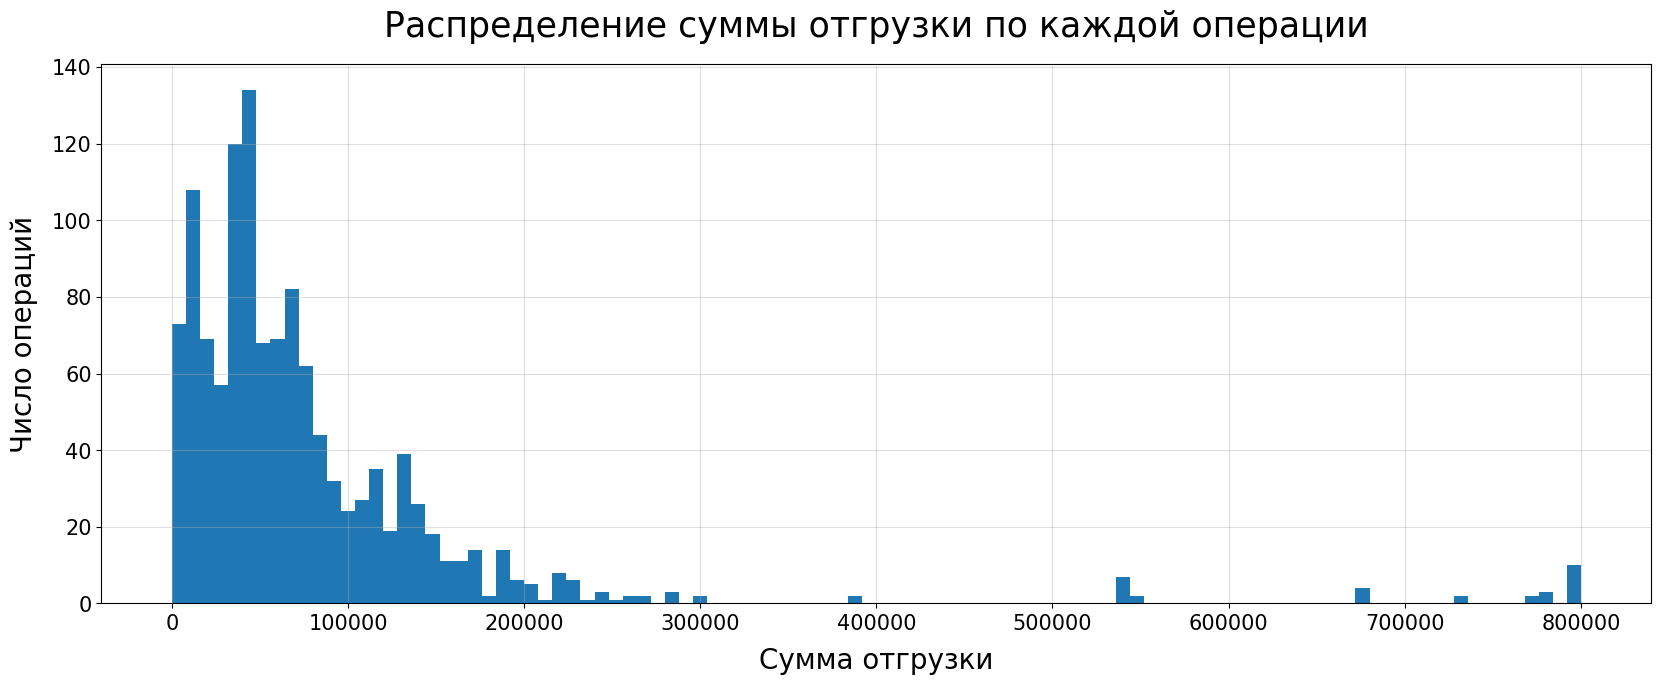

In [31]:
df_full['amount'].hist(figsize=(20, 7), bins=100)

plt.grid(True, alpha=0.4)
plt.xlabel('Сумма отгрузки', labelpad=10, fontsize=20)
plt.ylabel('Число операций', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение суммы отгрузки по каждой операции', pad=20, fontsize=25);

Нам больше не нужны записи по каждой операции, можем агрегирвать сумму `amount` по каждому проекту и месяцу. Данные за один месяц будут сведены в одно наблюдение. Таким образом:
- обработаем значения `amount` содержавшие `в ноль`
- избавимся от официальных дублей в столбце `double`

In [32]:
# группируем с учетом категории 'vnull'
df_full_long = df_full.groupby(['id', 'vnull', 'manager_name', 'month_number', 'month_end', 'month_long'], as_index=False)['amount'].sum() 

# создадим столбец с предыдущим значением для каждого наблюдения
df_full_long['amount_shift'] = df_full_long.groupby('id')['amount'].shift(1)

# заполним эти строки значениями предыдущего месяца
df_full_long.loc[df_full_long['vnull'] == 1, 'amount'] = df_full_long.loc[df_full_long['vnull'] == 1, 'amount_shift']

# удаляем служебные столбцы
df_full_long = df_full_long.drop(columns=['vnull', 'amount_shift'])
df_full_long

,id,manager_name,month_number,month_end,month_long,amount
0,31,Васильев Артем Александрович,-1,0.0,2.0,55100.0
1,31,Васильев Артем Александрович,0,0.0,2.0,55100.0
2,31,Васильев Артем Александрович,1,0.0,2.0,0.0
3,31,Васильев Артем Александрович,2,0.0,2.0,44775.0
4,31,Васильев Артем Александрович,3,0.0,2.0,44775.0
...,...,...,...,...,...,...
1387,1015,Смирнова Ольга Владимировна,10,11.0,1.0,0.0
1388,1015,Смирнова Ольга Владимировна,11,11.0,1.0,163700.0
1389,1015,Смирнова Ольга Владимировна,12,11.0,1.0,15000.0
1390,1015,Смирнова Ольга Владимировна,13,11.0,1.0,0.0


Сейчас нам предстоит рассчитывать коэффициенты, чтобы избежать деления на ноль, заменим нули на NaN

In [33]:
df_full_long['amount'] = df_full_long['amount'].replace(0, np.nan)

Посмотрим на распределение сумм отгрузки по операциям без учета нулевых

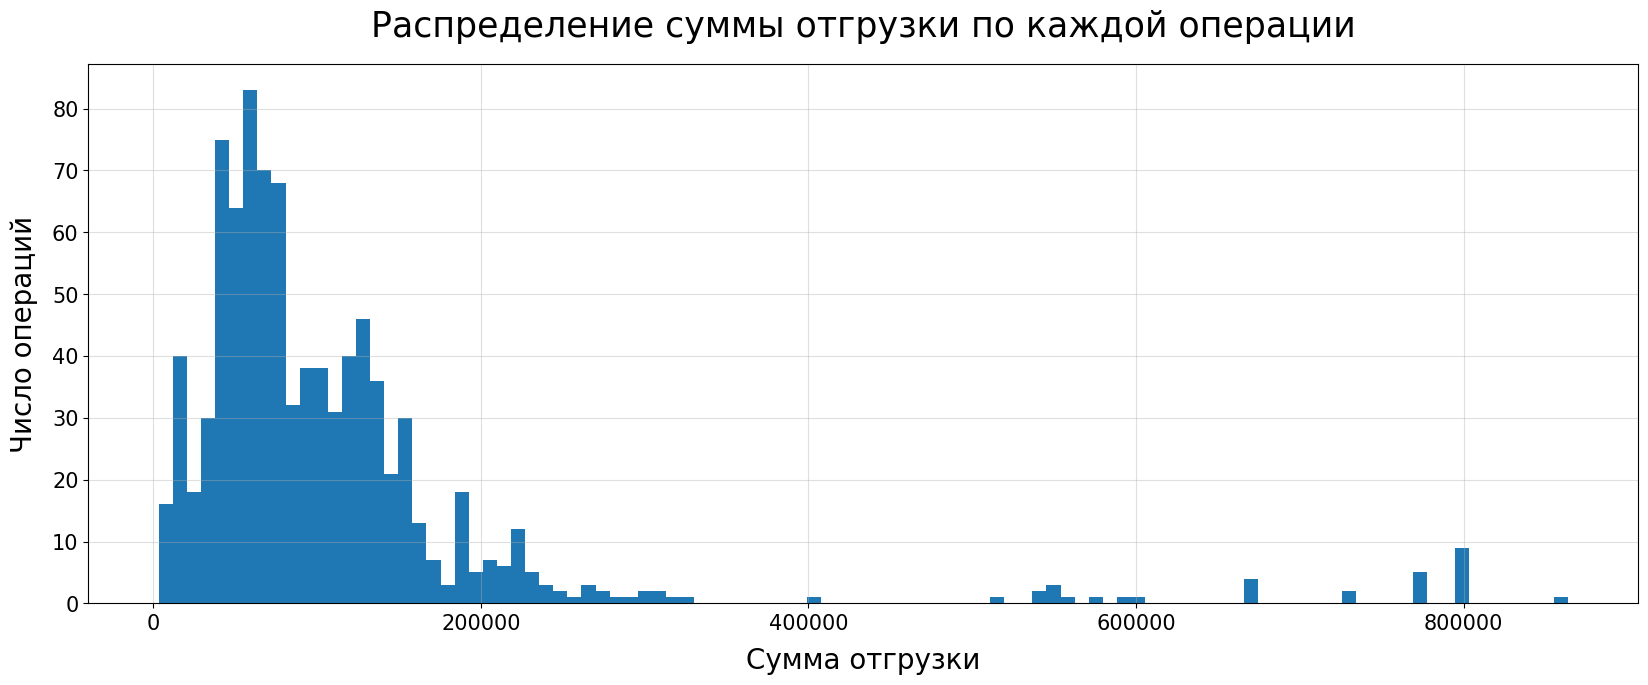

In [34]:
df_full_long['amount'].hist(figsize=(20, 7), bins=100)

plt.grid(True, alpha=0.4)
plt.xlabel('Сумма отгрузки', labelpad=10, fontsize=20)
plt.ylabel('Число операций', labelpad=10, fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Распределение суммы отгрузки по каждой операции', pad=20, fontsize=25);

### Первый коэффициент для каждого менеджера

####  Рассчет коэффициента по месяцам

##### Сумма отгрузки проектов пролонгированных в первый месяц 

In [35]:
month_long_1 = df_full_long[df_full_long['month_long'] == 1].pivot_table(index=['manager_name', 'month_number'], values='amount', aggfunc='sum')
month_long_1 = month_long_1.reset_index()
month_long_1

,manager_name,month_number,amount
0,Васильев Артем Александрович,-1,549201.07
1,Васильев Артем Александрович,0,531001.39
2,Васильев Артем Александрович,1,735399.19
3,Васильев Артем Александрович,2,940949.03
4,Васильев Артем Александрович,3,1643453.98
...,...,...,...
123,Соколова Анастасия Викторовна,10,1322295.00
124,Соколова Анастасия Викторовна,11,1314060.00
125,Соколова Анастасия Викторовна,12,1324475.00
126,Соколова Анастасия Викторовна,13,1175225.00


##### Сумма отгрузки за последний месяц реализации всех проектов, завершившихся в предыдущем месяце

In [36]:
# создадим таблицу с информацией о проектах, завершившихся в текущем месяце
month_long_before = df_full_long[df_full_long['month_number'] == df_full_long['month_end']].pivot_table(index=['manager_name', 'month_number'], 
                                                                                                        values='amount', 
                                                                                                        aggfunc='sum').reset_index()

# создадим столбец с суммой проектов завершившихся в прошлом месяце (для каждого менеджера отдельно)
month_long_before['amount_sum_before'] = month_long_before.groupby(['manager_name'])['amount'].shift(1)

# создадим столбец с номер предыдущего месяца
month_long_before['month_before'] = month_long_before.groupby(['manager_name'])['month_number'].shift(1)
month_long_before.reset_index()

,index,manager_name,month_number,amount,amount_sum_before,month_before
0,0,Васильев Артем Александрович,0,55100.00,NaN,NaN
1,1,Васильев Артем Александрович,3,25672.50,55100.00,0.0
2,2,Васильев Артем Александрович,7,180000.00,25672.50,3.0
3,3,Васильев Артем Александрович,10,98527.50,180000.00,7.0
4,4,Васильев Артем Александрович,11,61000.00,98527.50,10.0
5,5,Васильев Артем Александрович,12,1887780.96,61000.00,11.0
6,6,Иванова Мария Сергеевна,0,296130.71,NaN,NaN
7,7,Иванова Мария Сергеевна,3,257700.00,296130.71,0.0
8,8,Иванова Мария Сергеевна,5,147445.00,257700.00,3.0
9,9,Иванова Мария Сергеевна,7,207256.20,147445.00,5.0


- Чтобы каждая строка содержала значения из предыдущего месяца, нужно для каждого менеджера удалить суммы предыдущих месяцев, которые не являются непосредственными (т. е. отстают от текущего больше чем на 1 месяц).
- Данные для отрицательных месяцев нас не интересуют, так как они выходят за рамки анализируемого года, и их можно игнорировать (суммы предыдущих месяцев в них можно обнулить).

In [37]:
# создадим столбец с разницей между месяцами нынешнего и предыдущего наблюдения 
month_long_before['month_dif'] = month_long_before['month_number'] - month_long_before['month_before']
month_long_before

# для всех, у кого разница между соседнями записями больше, чем 1 месяц (в диапазоне от 1 до 12) - обнулим сумму предыдущего месяца
month_long_before['amount_sum_before'] = month_long_before['amount_sum_before'].mask(month_long_before['month_dif'] != 1, np.nan)
month_long_before

,manager_name,month_number,amount,amount_sum_before,month_before,month_dif
0,Васильев Артем Александрович,0,55100.00,NaN,NaN,NaN
1,Васильев Артем Александрович,3,25672.50,NaN,0.0,3.0
2,Васильев Артем Александрович,7,180000.00,NaN,3.0,4.0
3,Васильев Артем Александрович,10,98527.50,NaN,7.0,3.0
4,Васильев Артем Александрович,11,61000.00,98527.50,10.0,1.0
5,Васильев Артем Александрович,12,1887780.96,61000.00,11.0,1.0
6,Иванова Мария Сергеевна,0,296130.71,NaN,NaN,NaN
7,Иванова Мария Сергеевна,3,257700.00,NaN,0.0,3.0
8,Иванова Мария Сергеевна,5,147445.00,NaN,3.0,2.0
9,Иванова Мария Сергеевна,7,207256.20,NaN,5.0,2.0


##### Коэффициент для каждого менеджера по месяцам

In [38]:
# объединим таблицы по общему столбцу для рассчета коэффициента
coeff_1 = month_long_1.merge(month_long_before, on=['manager_name', 'month_number'], suffixes=('_1', ''))

# избавимся ото всех нулей в столбце, на который будем делить
coeff_1['amount_sum_before'] = coeff_1['amount_sum_before'].mask(coeff_1['amount_sum_before'] == 0, np.nan)

# приведем все наны к одному виду
coeff_1['amount_sum_before'] = coeff_1['amount_sum_before'].fillna(np.nan)


# рассчитаем первый коэффициент
coeff_1['long_coff_1'] = coeff_1['amount_1'] / coeff_1['amount_sum_before']


# обработаем нули и наны в итоговом столбце (в случае последующих потенциальных рассчетов) 
coeff_1['long_coff_1'] = coeff_1['long_coff_1'].mask(coeff_1['long_coff_1'] == 0, np.nan)
coeff_1['long_coff_1'] = coeff_1['long_coff_1'].fillna(np.nan)

coeff_1.reset_index()

,index,manager_name,month_number,amount_1,amount,amount_sum_before,month_before,month_dif,long_coff_1
0,0,Васильев Артем Александрович,0,531001.39,55100.00,NaN,NaN,NaN,NaN
1,1,Васильев Артем Александрович,3,1643453.98,25672.50,NaN,0.0,3.0,NaN
2,2,Васильев Артем Александрович,7,1810015.06,180000.00,NaN,3.0,4.0,NaN
3,3,Васильев Артем Александрович,10,1936606.06,98527.50,NaN,7.0,3.0,NaN
4,4,Васильев Артем Александрович,11,1916162.41,61000.00,98527.50,10.0,1.0,19.447996
5,5,Васильев Артем Александрович,12,1901870.96,1887780.96,61000.00,11.0,1.0,31.178212
6,6,Иванова Мария Сергеевна,0,296130.71,296130.71,NaN,NaN,NaN,NaN
7,7,Иванова Мария Сергеевна,3,60823.75,257700.00,NaN,0.0,3.0,NaN
8,8,Иванова Мария Сергеевна,5,304063.75,147445.00,NaN,3.0,2.0,NaN
9,9,Иванова Мария Сергеевна,7,282051.20,207256.20,NaN,5.0,2.0,NaN


##### Приведем таблицу к конечному читаемому виду

In [39]:
# создадим функцию для замены ранговых значений месяцев на их названия
def number_month(x):
    for m, n in months.items():
        if x == n:
            return m

# создаем столбец с названиями меяцев
coeff_1['month'] = coeff_1['month_number'].apply(number_month)

# оставляем только те, которые соответствуют 2023 году (от 1 до 12)
coeff_1 = coeff_1[coeff_1['month'].notna()]

# формируем итогувую таблицу
coeff_1 = coeff_1[['manager_name', 'month',  'long_coff_1']]
coeff_1 = coeff_1.reset_index(drop=True)
coeff_1

,manager_name,month,long_coff_1
0,Васильев Артем Александрович,март,NaN
1,Васильев Артем Александрович,июль,NaN
2,Васильев Артем Александрович,октябрь,NaN
3,Васильев Артем Александрович,ноябрь,19.447996
4,Васильев Артем Александрович,декабрь,31.178212
5,Иванова Мария Сергеевна,март,NaN
6,Иванова Мария Сергеевна,май,NaN
7,Иванова Мария Сергеевна,июль,NaN
8,Иванова Мария Сергеевна,август,0.812081
9,Кузнецов Михаил Иванович,февраль,NaN


### Первый коэффициент для всего отдела

####  Рассчет коэффициента по месяцам

##### Сумма отгрузки проектов пролонгированных в первый месяц 

In [40]:
month_long_1_dep = df_full_long[df_full_long['month_long'] == 1].pivot_table(index=['month_number'], values='amount', aggfunc='sum')
month_long_1_dep = month_long_1_dep.reset_index()
month_long_1_dep

,month_number,amount
0,-1,3284392.82
1,0,3716417.85
2,1,4252069.36
3,2,4579594.95
4,3,5081705.83
5,4,4934952.24
6,5,5675119.01
7,6,5553515.23
8,7,5725582.15
9,8,5897514.08


##### Сумма отгрузки за последний месяц реализации всех проектов, завершившихся в предыдущем месяце

In [41]:
# создадим таблицу с информацией о проектах, завершившихся в текущем месяце
month_long_before_dep = df_full_long[df_full_long['month_number'] == df_full_long['month_end']].pivot_table(index=['month_number'], 
                                                                                                            values='amount',
                                                                                                            aggfunc='sum')
# убираем мультииндекс
month_long_before_dep = month_long_before_dep.reset_index()

# создадим столбец с суммой проектов завершившихся в прошлом месяце
month_long_before_dep['amount_sum_before'] = month_long_before_dep['amount'].shift(1)
month_long_before_dep = month_long_before_dep.reset_index(drop=True)
month_long_before_dep

,month_number,amount,amount_sum_before
0,0,486030.71,NaN
1,1,883085.00,486030.71
2,2,0.00,883085.00
3,3,329752.50,0.00
4,5,217144.35,329752.50
5,6,150705.00,217144.35
6,7,440226.20,150705.00
7,8,281360.00,440226.20
8,9,1210649.25,281360.00
9,10,249753.97,1210649.25


##### Коэффициент для всего отдела по месяцам

In [42]:
# объединим таблицы по общему столбцу для рассчета коэффициента
coeff_1_dep = month_long_1_dep.merge(month_long_before_dep, on=['month_number'], suffixes=('_1', ''))

# избавимся от всех нулей в столбце, на который будем делить
coeff_1_dep['amount_sum_before'] = coeff_1_dep['amount_sum_before'].mask(coeff_1_dep['amount_sum_before'] == 0, np.nan)

# приведем все наны к одному виду
coeff_1_dep['amount_sum_before'] = coeff_1_dep['amount_sum_before'].fillna(np.nan)

# рассчитаем первый коэффициент
coeff_1_dep['long_coff_1'] = coeff_1_dep['amount_1'] / coeff_1_dep['amount_sum_before']

# обработаем нули и наны в итоговом столбце (в случае последующих потенциальных рассчетов) 
coeff_1_dep['long_coff_1'] = coeff_1_dep['long_coff_1'].mask(coeff_1_dep['long_coff_1'] == 0, np.nan)
coeff_1_dep['long_coff_1'] = coeff_1_dep['long_coff_1'].fillna(np.nan)

coeff_1_dep

,month_number,amount_1,amount,amount_sum_before,long_coff_1
0,0,3716417.85,486030.71,NaN,NaN
1,1,4252069.36,883085.00,486030.71,8.748561
2,2,4579594.95,0.00,883085.00,5.185905
3,3,5081705.83,329752.50,NaN,NaN
4,5,5675119.01,217144.35,329752.50,17.210238
5,6,5553515.23,150705.00,217144.35,25.575223
6,7,5725582.15,440226.20,150705.00,37.991985
7,8,5897514.08,281360.00,440226.20,13.396554
8,9,6205821.64,1210649.25,281360.00,22.056517
9,10,7144387.32,249753.97,1210649.25,5.901286


##### Приведем таблицу к конечному читаемому виду

In [43]:
# создаем столбец с названиями меяцев
coeff_1_dep.loc[:, 'month'] = coeff_1_dep['month_number'].apply(number_month)

# оставляем только те, которые соответствуют 2023 году (от 1 до 12)
coeff_1_dep = coeff_1_dep[coeff_1_dep['month'].notna()]

# формируем итогувую таблицу
coeff_1_dep = coeff_1_dep[['month',  'long_coff_1']]
coeff_1_dep = coeff_1_dep.reset_index(drop=True)
coeff_1_dep

,month,long_coff_1
0,январь,8.748561
1,февраль,5.185905
2,март,NaN
3,май,17.210238
4,июнь,25.575223
5,июль,37.991985
6,август,13.396554
7,сентябрь,22.056517
8,октябрь,5.901286
9,ноябрь,29.605476


####  Рассчет коэффициента за год

##### Рассчитаем первый коэффициент для каждого менеджера за год

In [44]:
# заменяем все пропуски нулями, чтобы учесть их при рассчете среднего за год
# coeff_1_yer = coeff_1.fillna(0)
coeff_1_yer = coeff_1

# агрегируем по менеджеру - среднее как раз и будет годовым коэфициентом
coeff_1_yer = coeff_1_yer.pivot_table(index='manager_name', values='long_coff_1', aggfunc='mean')
coeff_1_yer = coeff_1_yer.reset_index()
coeff_1_yer

,manager_name,long_coff_1
0,Васильев Артем Александрович,25.313104
1,Иванова Мария Сергеевна,0.812081
2,Кузнецов Михаил Иванович,6.259815
3,Попова Екатерина Николаевна,13.357366
4,Смирнова Ольга Владимировна,5.918205
5,Соколова Анастасия Викторовна,9.121343


##### Рассчитаем первый коэффициент для всего отдела за год

Для расчёта коэффициента для всего отдела за год нужно создать столбец с категориями, где все месяцы, попадающие в наш год, будут иметь категорию "2023". Остальные месяцы оставляем без изменений.  

Затем делаем по этим категориям сводную таблицу и получаем значение для всего отдела за год.  После этого все строки, где категория не "2023", отбрасываем.  В результате должна остаться просто одна строка с годом и коэффициентом.


In [45]:
# создаим функицию, которая пометит все записи соотвествующие 2023 году
def year_(x):
    if x in range(1, 13):
        return '2023 год'
    else:
        return x

# создадим такой столбец
df_full_long['year'] = df_full_long['month_number'].apply(year_)
df_full_long

,id,manager_name,month_number,month_end,month_long,amount,year
0,31,Васильев Артем Александрович,-1,0.0,2.0,55100.0,-1
1,31,Васильев Артем Александрович,0,0.0,2.0,55100.0,0
2,31,Васильев Артем Александрович,1,0.0,2.0,NaN,2023 год
3,31,Васильев Артем Александрович,2,0.0,2.0,44775.0,2023 год
4,31,Васильев Артем Александрович,3,0.0,2.0,44775.0,2023 год
...,...,...,...,...,...,...,...
1387,1015,Смирнова Ольга Владимировна,10,11.0,1.0,NaN,2023 год
1388,1015,Смирнова Ольга Владимировна,11,11.0,1.0,163700.0,2023 год
1389,1015,Смирнова Ольга Владимировна,12,11.0,1.0,15000.0,2023 год
1390,1015,Смирнова Ольга Владимировна,13,11.0,1.0,NaN,13


##### Сумма для проектов пролонгированных в первый месяц по каждому месяцу

In [46]:
# добавим значение года в сортировку
month_long_1_dep_yer = df_full_long[df_full_long['month_long'] == 1].pivot_table(index=['month_number', 'year'], values='amount', aggfunc='sum')
month_long_1_dep_yer = month_long_1_dep_yer.reset_index()
month_long_1_dep_yer

,month_number,year,amount
0,-1,-1,3284392.82
1,0,0,3716417.85
2,1,2023 год,4252069.36
3,2,2023 год,4579594.95
4,3,2023 год,5081705.83
5,4,2023 год,4934952.24
6,5,2023 год,5675119.01
7,6,2023 год,5553515.23
8,7,2023 год,5725582.15
9,8,2023 год,5897514.08


##### Сумма предыдущего месяца для проектов по каждому месяцу

In [47]:
# создадим таблицу с информацией о проектах, завершившихся в текущем месяце
month_long_before_dep_yer = df_full_long[df_full_long['month_number'] == df_full_long['month_end']].pivot_table(index=['month_number', 'year'], 
                                                                                                            values='amount',
                                                                                                            aggfunc='sum')
# убираем мультииндекс
month_long_before_dep_yer = month_long_before_dep.reset_index(drop=True)

# создадим столбец с суммой проектов завершившихся в прошлом месяце
month_long_before_dep_yer['amount_sum_before'] = month_long_before_dep_yer['amount'].shift(1)
month_long_before_dep_yer = month_long_before_dep_yer.reset_index(drop=True)
month_long_before_dep_yer

,month_number,amount,amount_sum_before
0,0,486030.71,NaN
1,1,883085.00,486030.71
2,2,0.00,883085.00
3,3,329752.50,0.00
4,5,217144.35,329752.50
5,6,150705.00,217144.35
6,7,440226.20,150705.00
7,8,281360.00,440226.20
8,9,1210649.25,281360.00
9,10,249753.97,1210649.25


##### Первый коэффициент для всего отдела по каждому месяцу с учетом года 

In [48]:
# объединим таблицы по общему столбцу для рассчета коэффициента
coeff_1_dep_yer = month_long_1_dep_yer.merge(month_long_before_dep_yer, on=['month_number'], suffixes=('_1', ''))

# избавимся от всех нулей в столбце, на который будем делить
coeff_1_dep_yer['amount_sum_before'] = coeff_1_dep_yer['amount_sum_before'].mask(coeff_1_dep_yer['amount_sum_before'] == 0, np.nan)

# приведем все наны к одному виду
coeff_1_dep_yer['amount_sum_before'] = coeff_1_dep_yer['amount_sum_before'].fillna(np.nan)

# рассчитаем первый коэффициент
coeff_1_dep_yer['long_coff_1'] = coeff_1_dep_yer['amount_1'] / coeff_1_dep_yer['amount_sum_before']

# обработаем нули и наны в итоговом столбце (в случае последующих потенциальных рассчетов) 
coeff_1_dep_yer['long_coff_1'] = coeff_1_dep_yer['long_coff_1'].mask(coeff_1_dep_yer['long_coff_1'] == 0, np.nan)
coeff_1_dep_yer['long_coff_1'] = coeff_1_dep_yer['long_coff_1'].fillna(np.nan)

coeff_1_dep_yer

,month_number,year,amount_1,amount,amount_sum_before,long_coff_1
0,0,0,3716417.85,486030.71,NaN,NaN
1,1,2023 год,4252069.36,883085.00,486030.71,8.748561
2,2,2023 год,4579594.95,0.00,883085.00,5.185905
3,3,2023 год,5081705.83,329752.50,NaN,NaN
4,5,2023 год,5675119.01,217144.35,329752.50,17.210238
5,6,2023 год,5553515.23,150705.00,217144.35,25.575223
6,7,2023 год,5725582.15,440226.20,150705.00,37.991985
7,8,2023 год,5897514.08,281360.00,440226.20,13.396554
8,9,2023 год,6205821.64,1210649.25,281360.00,22.056517
9,10,2023 год,7144387.32,249753.97,1210649.25,5.901286


##### Первый коэффициент для всего отдела за год

In [49]:
# агрегируем по году - получаем среднее по тем месяцам, которые соответствуют нашему целевому году (2023)
coeff_1_dep_yer = coeff_1_dep_yer.pivot_table(index='year', values='long_coff_1', aggfunc='mean').reset_index()

# делаем срез по 2023 году
coeff_1_dep_yer = coeff_1_dep_yer[coeff_1_dep_yer['year'] == '2023 год'].reset_index(drop=True)
coeff_1_dep_yer

,year,long_coff_1
0,2023 год,17.04348


### Второй коэффициент для каждого менеджера

####  Рассчет коэффициента по месяцам

##### Сумма отгрузки проектов пролонгированных во второй месяц 

In [50]:
month_long_2 = df_full_long[df_full_long['month_long'] == 2].pivot_table(index=['manager_name', 'month_number'], values='amount', aggfunc='sum')
month_long_2 = month_long_2.reset_index()
month_long_2

,manager_name,month_number,amount
0,Васильев Артем Александрович,-1,55100.0
1,Васильев Артем Александрович,0,55100.0
2,Васильев Артем Александрович,1,131230.0
3,Васильев Артем Александрович,2,174075.0
4,Васильев Артем Александрович,3,164200.0
...,...,...,...
75,Соколова Анастасия Викторовна,10,46995.0
76,Соколова Анастасия Викторовна,11,46995.0
77,Соколова Анастасия Викторовна,12,46995.0
78,Соколова Анастасия Викторовна,13,46995.0


##### Сумма отгрузки последнего месяца проектов, не пролонгированных в первый

Создаем словарь, где каждому проекту соответствует его максимальный месяц

In [51]:
# удалим сначала нулевые значения сумм (оказывается, по каждому проекту есть запись в каждый месяц, даже если по нему не было операции) 
last_non_1 = df_full_long[df_full_long['amount'].notna()]

# а теперь возьмем максмальное значение по каждому проекту за последний месяц по которому была отгрузка
last_non_1 = last_non_1.pivot_table(index=['id'], values='month_number', aggfunc='max').reset_index()
last_non_1.columns = ['id', 'last_non_1']
last_non_1

,id,last_non_1
0,31,14
1,48,14
2,56,14
3,107,14
4,112,14
...,...,...
82,975,14
83,977,14
84,998,14
85,1012,12


Добавляем последний месяц оплаты по каждому месяцу

In [52]:
df_full_long = df_full_long.merge(last_non_1, on='id')
df_full_long

,id,manager_name,month_number,month_end,month_long,amount,year,last_non_1
0,31,Васильев Артем Александрович,-1,0.0,2.0,55100.0,-1,14
1,31,Васильев Артем Александрович,0,0.0,2.0,55100.0,0,14
2,31,Васильев Артем Александрович,1,0.0,2.0,NaN,2023 год,14
3,31,Васильев Артем Александрович,2,0.0,2.0,44775.0,2023 год,14
4,31,Васильев Артем Александрович,3,0.0,2.0,44775.0,2023 год,14
...,...,...,...,...,...,...,...,...
1387,1015,Смирнова Ольга Владимировна,10,11.0,1.0,NaN,2023 год,12
1388,1015,Смирнова Ольга Владимировна,11,11.0,1.0,163700.0,2023 год,12
1389,1015,Смирнова Ольга Владимировна,12,11.0,1.0,15000.0,2023 год,12
1390,1015,Смирнова Ольга Владимировна,13,11.0,1.0,NaN,13,12


Все-таки нужно считать не по последней сумме, а по месяцу завершения проекта. Тогда всё проще: смотрим на совпадение месяца записи с месяцем завершения проекта и помечаем такие строки.

In [53]:
# создаем функцию, которая проверяет соответстве строки последнему месяцу проекта
def last_month_row(x):
    return x['month_number'] == x['month_end']

# метим эти строки
df_full_long['last_month_row'] = df_full_long.apply(last_month_row, axis=1)
df_full_long

,id,manager_name,month_number,month_end,month_long,amount,year,last_non_1,last_month_row
0,31,Васильев Артем Александрович,-1,0.0,2.0,55100.0,-1,14,False
1,31,Васильев Артем Александрович,0,0.0,2.0,55100.0,0,14,True
2,31,Васильев Артем Александрович,1,0.0,2.0,NaN,2023 год,14,False
3,31,Васильев Артем Александрович,2,0.0,2.0,44775.0,2023 год,14,False
4,31,Васильев Артем Александрович,3,0.0,2.0,44775.0,2023 год,14,False
...,...,...,...,...,...,...,...,...,...
1387,1015,Смирнова Ольга Владимировна,10,11.0,1.0,NaN,2023 год,12,False
1388,1015,Смирнова Ольга Владимировна,11,11.0,1.0,163700.0,2023 год,12,True
1389,1015,Смирнова Ольга Владимировна,12,11.0,1.0,15000.0,2023 год,12,False
1390,1015,Смирнова Ольга Владимировна,13,11.0,1.0,NaN,13,12,False


Получаем таблицу, где хранятся записи по месяцу завершения каждого не пролонгированного в первый месяц проекта

In [54]:
# ставляем только строки по месяцу завершения проекта
last_non_1 = df_full_long[df_full_long['last_month_row'] == True]

# не пролонгированные в первый месяц
last_non_1 = last_non_1[last_non_1['month_long'] != 1]
last_non_1

,id,manager_name,month_number,month_end,month_long,amount,year,last_non_1,last_month_row
1,31,Васильев Артем Александрович,0,0.0,2.0,55100.00,0,14,True
28,48,Смирнова Ольга Владимировна,11,11.0,2.0,39726.00,2023 год,14,True
36,56,Васильев Артем Александрович,3,3.0,10.0,25672.50,2023 год,14,True
77,112,Михайлов Андрей Сергеевич,12,12.0,2.0,132410.00,2023 год,14,True
161,266,Соколова Анастасия Викторовна,0,0.0,2.0,45950.00,0,13,True
230,294,Смирнова Ольга Владимировна,5,5.0,2.0,69699.35,2023 год,14,True
266,348,Попова Екатерина Николаевна,9,9.0,2.0,16685.00,2023 год,14,True
338,493,Смирнова Ольга Владимировна,1,1.0,2.0,48000.00,2023 год,14,True
356,506,Иванова Мария Сергеевна,3,3.0,11.0,257700.00,2023 год,14,True
643,732,Кузнецов Михаил Иванович,2,2.0,3.0,NaN,2023 год,5,True


Сумма отгрузки последнего месяца проектов, не пролонгированных в первый¶

In [55]:
month_non_long_1 = last_non_1.pivot_table(index=['manager_name', 'month_number'],values='amount', aggfunc='sum')
month_non_long_1.reset_index()

,manager_name,month_number,amount
0,Васильев Артем Александрович,0,55100.00
1,Васильев Артем Александрович,3,25672.50
2,Васильев Артем Александрович,10,98527.50
3,Васильев Артем Александрович,12,227660.00
4,Иванова Мария Сергеевна,3,257700.00
5,Кузнецов Михаил Иванович,2,0.00
6,Михайлов Андрей Сергеевич,12,132410.00
7,Попова Екатерина Николаевна,9,16685.00
8,Попова Екатерина Николаевна,11,45205.00
9,Смирнова Ольга Владимировна,1,48000.00


##### Рассчитаем второй коэффициент для каждого менеджера по месяцам

In [56]:
# объединяем таблицы для рассчета коэфа
coeff_2 = month_long_2.merge(month_non_long_1, on=['manager_name', 'month_number'], suffixes=('_long_2', '_non_long_1'))

# избавляемся от нулей в делителе
coeff_2['amount_non_long_1'] = coeff_2['amount_non_long_1'].mask(coeff_2['amount_non_long_1'] == 0, np.nan)

# считаем коэф
coeff_2['long_coff_2'] = coeff_2['amount_long_2'] / coeff_2['amount_non_long_1']
coeff_2

,manager_name,month_number,amount_long_2,amount_non_long_1,long_coff_2
0,Васильев Артем Александрович,0,55100.00,55100.00,1.000000
1,Васильев Артем Александрович,3,164200.00,25672.50,6.395949
2,Васильев Артем Александрович,10,373337.50,98527.50,3.789171
3,Васильев Артем Александрович,12,359975.00,227660.00,1.581196
4,Михайлов Андрей Сергеевич,12,132410.00,132410.00,1.000000
5,Попова Екатерина Николаевна,9,16685.00,16685.00,1.000000
6,Попова Екатерина Николаевна,11,66605.00,45205.00,1.473399
7,Смирнова Ольга Владимировна,1,116879.70,48000.00,2.434994
8,Смирнова Ольга Владимировна,5,124924.35,69699.35,1.792332
9,Смирнова Ольга Владимировна,11,288561.00,39726.00,7.263782


##### Приведем таблицу к конечному читаемому виду

In [57]:
# создадим функцию для замены ранговых значений месяцев на их названия
def number_month(x):
    for m, n in months.items():
        if x == n:
            return m

# создаем столбец с названиями меяцев
coeff_2['month'] = coeff_2['month_number'].apply(number_month)

# оставляем только те, которые соответствуют 2023 году (от 1 до 12)
coeff_2 = coeff_2[coeff_2['month'].notna()]

# формируем итогувую таблицу
coeff_2 = coeff_2[['manager_name', 'month',  'long_coff_2']]
coeff_2 = coeff_2.reset_index(drop=True)
coeff_2

,manager_name,month,long_coff_2
0,Васильев Артем Александрович,март,6.395949
1,Васильев Артем Александрович,октябрь,3.789171
2,Васильев Артем Александрович,декабрь,1.581196
3,Михайлов Андрей Сергеевич,декабрь,1.000000
4,Попова Екатерина Николаевна,сентябрь,1.000000
5,Попова Екатерина Николаевна,ноябрь,1.473399
6,Смирнова Ольга Владимировна,январь,2.434994
7,Смирнова Ольга Владимировна,май,1.792332
8,Смирнова Ольга Владимировна,ноябрь,7.263782
9,Смирнова Ольга Владимировна,декабрь,1.883893


### Второй коэффициент для всего отдела

####  Рассчет коэффициента по месяцам

##### Сумма отгрузки проектов пролонгированных во второй месяц 

In [58]:
month_long_2_dep = df_full_long[df_full_long['month_long'] == 2].pivot_table(index=['month_number'], values='amount', aggfunc='sum')
month_long_2_dep = month_long_2_dep.reset_index()
month_long_2_dep

,month_number,amount
0,-1,432343.00
1,0,429629.70
2,1,387969.70
3,2,566535.70
4,3,615825.70
5,4,492565.70
6,5,673734.35
7,6,662882.50
8,7,875777.50
9,8,770050.00


##### Сумма отгрузки последнего месяца проектов, не пролонгированных в первый

In [59]:
month_non_long_1_dep = last_non_1.pivot_table(index=['month_number'], values='amount', aggfunc='sum')
month_non_long_1_dep.reset_index()

,month_number,amount
0,0,101050.00
1,1,48000.00
2,2,0.00
3,3,283372.50
4,5,69699.35
5,9,16685.00
6,10,98527.50
7,11,84931.00
8,12,511870.00


##### Рассчитаем второй коэффициент для всего отдела по месяцам

In [60]:
# объединяем таблицы для рассчета коэфа
coeff_2_dep = month_long_2_dep.merge(month_non_long_1_dep, on=['month_number'], suffixes=('_long_2', '_non_long_1'))

# избавляемся от нулей в делителе
coeff_2_dep['amount_non_long_1'] = coeff_2_dep['amount_non_long_1'].mask(coeff_2_dep['amount_non_long_1'] == 0, np.nan)

# считаем коэф
coeff_2_dep['long_coff_2'] = coeff_2_dep['amount_long_2'] / coeff_2_dep['amount_non_long_1']
coeff_2_dep

,month_number,amount_long_2,amount_non_long_1,long_coff_2
0,0,429629.70,101050.00,4.251655
1,1,387969.70,48000.00,8.082702
2,2,566535.70,NaN,NaN
3,3,615825.70,283372.50,2.173202
4,5,673734.35,69699.35,9.666293
5,9,837633.50,16685.00,50.202787
6,10,865868.50,98527.50,8.788090
7,11,806531.00,84931.00,9.496309
8,12,845355.00,511870.00,1.651503


In [61]:
# создадим функцию для замены ранговых значений месяцев на их названия
def number_month(x):
    for m, n in months.items():
        if x == n:
            return m

# создаем столбец с названиями меяцев
coeff_2_dep.loc[:, 'month'] = coeff_2_dep['month_number'].apply(number_month)

# оставляем только те, которые соответствуют 2023 году (от 1 до 12)
coeff_2_dep = coeff_2_dep[coeff_2_dep['month'].notna()]

# формируем итогувую таблицу
coeff_2_dep = coeff_2_dep[['month',  'long_coff_2']]
coeff_2_dep = coeff_2_dep.reset_index(drop=True)
coeff_2_dep

,month,long_coff_2
0,январь,8.082702
1,февраль,NaN
2,март,2.173202
3,май,9.666293
4,сентябрь,50.202787
5,октябрь,8.788090
6,ноябрь,9.496309
7,декабрь,1.651503


### Второй коэффициент для каждого менеджера

#### Рассчет коэффициента за год

In [62]:
coeff_2_yer = coeff_2
coeff_2_yer = coeff_2_yer.pivot_table(index='manager_name', values='long_coff_2')
coeff_2_yer = coeff_2_yer.reset_index()
coeff_2_yer

,manager_name,long_coff_2
0,Васильев Артем Александрович,3.922105
1,Михайлов Андрей Сергеевич,1.000000
2,Попова Екатерина Николаевна,1.236699
3,Смирнова Ольга Владимировна,3.343750


### Второй коэффициент для всего отдела

#### Рассчет коэффициента за год

In [63]:
month_long_2_dep_year = df_full_long[df_full_long['month_long'] == 2].pivot_table(index=['month_number', 'year'], values='amount', aggfunc='sum')
month_long_2_dep_year = month_long_2_dep_year.reset_index()
month_long_2_dep_year

,month_number,year,amount
0,-1,-1,432343.00
1,0,0,429629.70
2,1,2023 год,387969.70
3,2,2023 год,566535.70
4,3,2023 год,615825.70
5,4,2023 год,492565.70
6,5,2023 год,673734.35
7,6,2023 год,662882.50
8,7,2023 год,875777.50
9,8,2023 год,770050.00


In [64]:
month_non_long_1_dep_year = last_non_1.pivot_table(index=['month_number', 'year'], values='amount', aggfunc='sum')
month_non_long_1_dep_year.reset_index()

,month_number,year,amount
0,0,0,101050.00
1,1,2023 год,48000.00
2,2,2023 год,0.00
3,3,2023 год,283372.50
4,5,2023 год,69699.35
5,9,2023 год,16685.00
6,10,2023 год,98527.50
7,11,2023 год,84931.00
8,12,2023 год,511870.00


In [65]:
# объединяем таблицы для рассчета коэфа
coeff_2_dep_year = month_long_2_dep_year.merge(month_non_long_1_dep_year, on=['month_number'], suffixes=('_long_2', '_non_long_1'))

# избавляемся от нулей в делителе
coeff_2_dep_year['amount_non_long_1'] = coeff_2_dep_year['amount_non_long_1'].mask(coeff_2_dep_year['amount_non_long_1'] == 0, np.nan)

# считаем коэф
coeff_2_dep_year['long_coff_2'] = coeff_2_dep_year['amount_long_2'] / coeff_2_dep_year['amount_non_long_1']
coeff_2_dep_year

,month_number,year,amount_long_2,amount_non_long_1,long_coff_2
0,0,0,429629.70,101050.00,4.251655
1,1,2023 год,387969.70,48000.00,8.082702
2,2,2023 год,566535.70,NaN,NaN
3,3,2023 год,615825.70,283372.50,2.173202
4,5,2023 год,673734.35,69699.35,9.666293
5,9,2023 год,837633.50,16685.00,50.202787
6,10,2023 год,865868.50,98527.50,8.788090
7,11,2023 год,806531.00,84931.00,9.496309
8,12,2023 год,845355.00,511870.00,1.651503


In [66]:
# агрегируем по году - получаем среднее по тем месяцам, которые соответствуют нашему целевому году (2023)
coeff_2_dep_year = coeff_2_dep_year.pivot_table(index='year', values='long_coff_2', aggfunc='mean').reset_index()

# делаем срез по 2023 году
coeff_2_dep_year = coeff_2_dep_year[coeff_2_dep_year['year'] == '2023 год'].reset_index(drop=True)
coeff_2_dep_year

,year,long_coff_2
0,2023 год,12.865841


### Выгружаем итоговые таблицы

Первые коэффициенты 

In [72]:
# первый коэф по менеджерам по месяцам
coeff_1.to_csv('m_month_1.csv', index=False, encoding='utf-8-sig')

# первый коэф по отделу по месяцам
coeff_1_dep.to_csv('d_month_1.csv', index=False, encoding='utf-8-sig')

# первый коэф по менеджерам по году
coeff_1_yer.to_csv('m_year_1.csv', index=False, encoding='utf-8-sig')

# первый коэф по отделу по году
coeff_1_dep_yer.to_csv('d_year_1.csv', index=False, encoding='utf-8-sig')

Вторые коэффициенты 

In [73]:
# второй коэф по менеджерам по месяцам
coeff_2.to_csv('m_month_2.csv', index=False, encoding='utf-8-sig')

# второй коэф по отделу по месяцам
coeff_2_dep.to_csv('d_month_2.csv', index=False, encoding='utf-8-sig')

# второй коэф по менеджерам по году
coeff_2_yer.to_csv('m_year_2.csv', index=False, encoding='utf-8-sig')

# второй коэф по отделу по году
coeff_2_dep_year.to_csv('d_year_2.csv', index=False, encoding='utf-8-sig')

Комбинированные коэффициенты 

In [83]:
# первый коэф по менеджерам по месяцам
m_m_1 = coeff_1.dropna()

# второй коэф по менеджерам по месяцам
m_m_2 = coeff_2.dropna()

# коэфы по менеджерам по месяцам
m_m_1_2 = m_m_1.merge(m_m_2, on=['manager_name', 'month'], how='outer')
m_m_1_2.to_csv('m_1_2_m.csv', index=False, encoding='utf-8-sig')

### Последующий анализ и отчет будут выполнены в гугл таблицах.